# Packages Necessary for the notebook

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.model_selection import cross_validate

from sklearn.metrics import precision_recall_fscore_support
import HelperFunctions2 as hf


%load_ext autoreload
%autoreload 2



all_stopwords = hf.return_stopwords(lists=[],append=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
#15235 comments #10k + 3k query + 2k neutral
filename = 'finalfbdata_clean_5c.csv'#'18kfinalfbdata_notclean.csv'
Tweets,Labels,brand=hf.load_data(filename,1,True)
Tweets_cleaned = hf.clean_data(Tweets,brand,all_stopwords)

print('Number of Comments:',np.size(Tweets))
print('Number of labels:',np.size(Labels))
print('Number of brand names:',np.size(brand))

np.unique(Labels)


Number of Comments: 11516
Number of labels: 11516
Number of brand names: 11516


array(['Negative', 'Neutral', 'Positive', 'Very Negative',
       'Very Positive'], dtype='<U13')

In [12]:
X = Tweets_cleaned#Tweets
y = Labels
b = brand
X_train, X_test, y_train, y_test, b_train,b_test = train_test_split(X, y,b, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test, b_val, b_test = train_test_split(X_test, y_test,b_test, test_size=0.1, random_state=42)

# Data Tokenization

In [13]:
tfidf = TfidfVectorizer(tokenizer=hf.tokenizer, norm='l2', analyzer='word',# hf.tokenizer
                        ngram_range=(1,4))#, stop_words=all_stopwords)
features_train = tfidf.fit_transform(X_train)
features_val = tfidf.transform(X_val)
features_test = tfidf.transform(X_test)

# Learning the model

In [19]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=0.58,penalty='l2', dual=True, max_iter=3000,class_weight='balanced')
out=svm.fit(features_train,y_train)
print(out.score(features_train,y_train))
print(out.score(features_test,y_test))

0.9938247780779622
0.7844827586206896


In [20]:
#np.size(np.unique(brand))

In [41]:
def brand_sentiment2(brand, Tweets, Labels, model,n,plot=True):
    features = tfidf.transform(Tweets)
    preds = svm.predict(features)
    tags = np.unique(brand)
    brand_data_acc={}
    brand_data_sentiment={}
    brand_instances={}
    for i in range(np.size(tags)):
        brand_data_acc[tags[i]]=0
        brand_data_sentiment[tags[i]]=0
        brand_instances[tags[i]]=0
    
    for j in range(np.size(preds)):
        brand_instances[brand[j]]+=1
        if Labels[j]==preds[j]:
            brand_data_acc[brand[j]]+=1
        if preds[j] == 'Very Positive':
            brand_data_sentiment[brand[j]]+=100                        
        elif preds[j] == 'Positive':
            brand_data_sentiment[brand[j]]+=50
        elif preds[j] == 'Neutral':
            brand_data_sentiment[brand[j]]+=0
        elif preds[j] == 'Negative':
            brand_data_sentiment[brand[j]]-=50
        elif preds[j] == 'Very Negative':
            brand_data_sentiment[brand[j]]-=100
            
    plt.figure(1,figsize=(12,7))
    plt.xlabel('Brand')
    plt.ylabel('Number of instances for the brand')
    plt.title('Brand Instances')
    for i in range(np.size(tags)):
        #print(brand_instances)
        brand_data_acc[tags[i]]=100*brand_data_acc[tags[i]]/brand_instances[tags[i]]
        brand_data_sentiment[tags[i]]=brand_data_sentiment[tags[i]]/brand_instances[tags[i]]
        #if plot:
        if i<n:
            plt.plot(tags[i],brand_instances[tags[i]],'bs')
            
    plt.figure(2,figsize=(12,7))
    plt.xlabel('Brand')
    plt.ylabel('Sentiment for the brand')
    plt.title('Brand Sentiment (+100 VP, +50P, 0N, -50Neg, -100VNeg)')
    for i in range(np.size(tags)):
        if i<n:
            plt.plot(tags[i],brand_data_sentiment[tags[i]],'gs')
    plt.figure(3,figsize=(12,7))
    plt.xlabel('Brand')
    plt.ylabel('Accuracy for the brand')
    plt.title('Brand Accuracy')
    for i in range(np.size(tags)):
        if i<n:
            plt.plot(tags[i],brand_data_acc[tags[i]],'rs')    
    #plt.plot()
    #return brand_data_acc,brand_data_sentiment
    

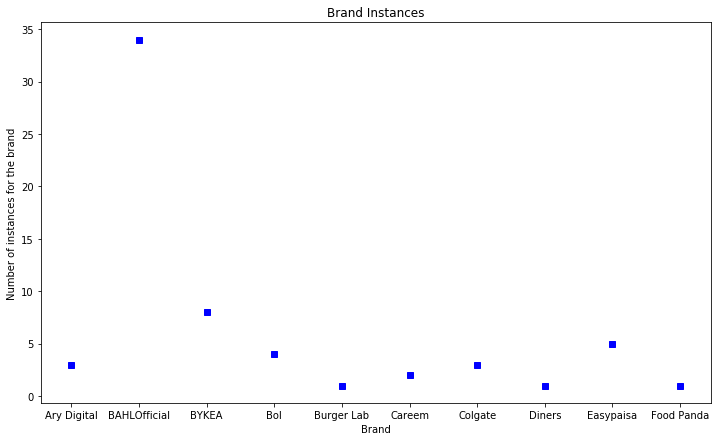

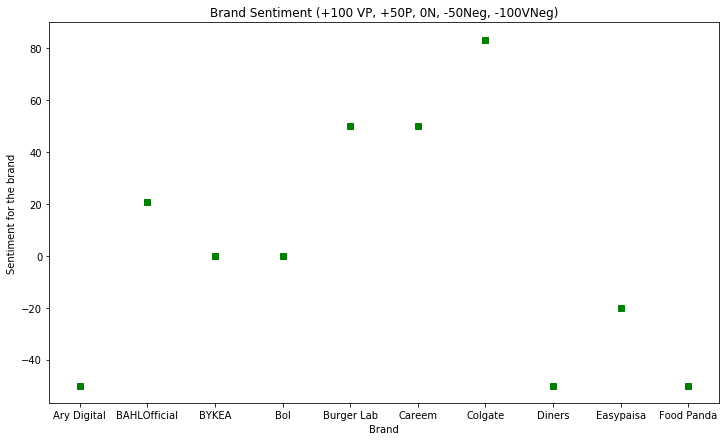

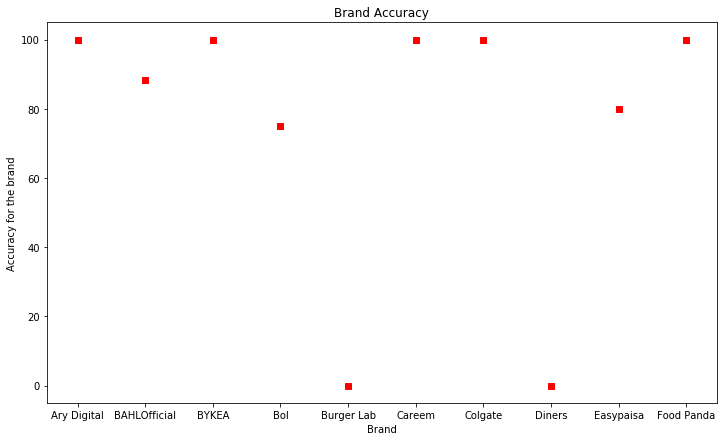

In [42]:
brand_sentiment2(b_test, X_test, y_test, svm,10,plot=True)

In [32]:
print(np.size(b_test))

116
